# Hi!

In today's workshop we are going to learn about most known concept of supervised learning which is `classification`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
print(load_breast_cancer().DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
X, y = load_breast_cancer(True)

In [4]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.66)

/home/marcin/.anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


###### What is classification?

Classification is a problem of predicting discrete value (classes) for given features. It is mainly viewed as a supervised learning problem.

###### What about applying linear regression for classification?

In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
X_train[0]

array([  1.36900000e+01,   1.60700000e+01,   8.78400000e+01,
         5.79100000e+02,   8.30200000e-02,   6.37400000e-02,
         2.55600000e-02,   2.03100000e-02,   1.87200000e-01,
         5.66900000e-02,   1.70500000e-01,   5.06600000e-01,
         1.37200000e+00,   1.40000000e+01,   4.23000000e-03,
         1.58700000e-02,   1.16900000e-02,   6.33500000e-03,
         1.94300000e-02,   2.17700000e-03,   1.48400000e+01,
         2.02100000e+01,   9.91600000e+01,   6.70600000e+02,
         1.10500000e-01,   2.09600000e-01,   1.34600000e-01,
         6.98700000e-02,   3.32300000e-01,   7.70100000e-02])

In [7]:
linear_reg.predict(X_val)

array([ 1.45177198,  0.70504476,  0.25909605,  0.13313162,  0.50991642,
        1.00308908,  0.85533749, -0.19038491,  1.31137713,  0.62773172,
        0.18136785,  0.54662921,  1.1671905 ,  1.12018796,  0.79641662,
       -0.23620468,  0.25932015,  0.22245168,  0.79455798,  1.02454931,
       -0.00229577,  1.18048099,  1.18524382,  0.22118924,  0.83161913,
        0.76266237,  0.3210468 , -0.29411628,  0.82571166,  1.0178464 ,
        0.35594696,  0.92037322,  0.70263526,  1.05485984,  0.71479478,
       -0.00457221,  0.22415378,  0.92790874,  0.65323519,  0.80416824,
        0.99404035,  0.46243048,  0.85042148,  1.3789115 , -0.0497269 ,
        0.06564306,  0.42152735,  0.75804468,  1.32428645,  1.15270242,
        0.7975561 ,  1.06357537,  0.91700387,  0.81753486,  0.71633007,
        0.59927682,  0.7071975 ,  0.83187121,  0.47839485,  0.9688968 ,
        1.08972135,  0.61506731,  0.90444321,  0.49868239,  1.10871607,
        0.68847029,  0.88163369,  0.77002993,  0.07319584,  1.04

How to interpret these predictions? Maybe we need something different?

###### What is logistic regression?

Logistic regression is about applying "squashing" function to the hypotheses.

$$\hat{y} = h_w(x)$$ 

$$h_w(x) = \sum_{j=0}^k w_j x_j = wx$$

$$\hat{y} = \sigma(h_w(x))$$ 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [8]:
x = np.linspace(-10, 10)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

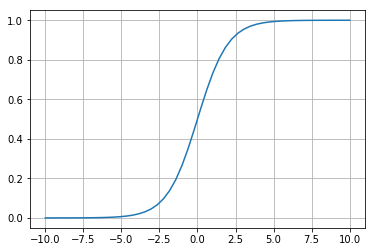

In [9]:
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.show()

In [10]:
sigmoid(np.inf), sigmoid(-np.inf)

(1.0, 0.0)

What about loss? Is MSE still applicable? 

There are reasons why we are not using MSE. Instead we use log-loss.

$$ L(w) = -\sum_{i=0}^n y^{(i)}\log{h_w(x^{(i)})} + (1-y^{(i)})\log{(1-h_w(x^{(i)}))}$$

$$ y^{(i)} \in \{0, 1\}$$

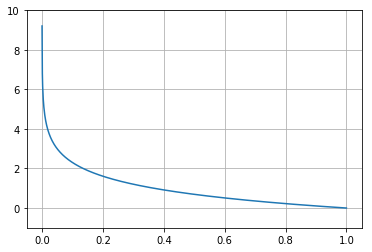

In [11]:
# y = 1

x = np.linspace(0.0001, 1, 1000)
plt.plot(x, -np.log(x))
plt.ylim(-1, 10)
plt.grid(True)
plt.show()

In [12]:
# y = 0

x = np.linspace(0, 0.9999, 1000)
plt.plot(x, -np.log(1 - x))
plt.ylim(-1, 10)
plt.grid(True)b
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-596061e6f8b3>, line 6)

What about gradient descent procedure? How does it change? Let's derive gradient on blackboard.

In [13]:
from importlib import reload

In [14]:
import solutions

In [15]:
solutions = reload(solutions)

In [16]:
def add_bias_feature(X):
       return np.c_[np.ones(len(X)), X]
X_train = add_bias_feature(X_train)

In [17]:
W = np.zeros(X_train.shape[1])

In [18]:
for _ in range(10000):
#     print(solutions.cost(W, X_train, y_train))
    W = solutions.gradient_step(W, X_train, y_train, 0.0001)
   

/mnt/E22AF74F2AF71F6B/Users/mprze/Dropbox/Studia/Bit/BIT_AI_old/2017_11_06_lab3/solutions.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(solutions._hypotheses(W, X_train) >= 0.5, y_train)

/mnt/E22AF74F2AF71F6B/Users/mprze/Dropbox/Studia/Bit/BIT_AI_old/2017_11_06_lab3/solutions.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.92713567839195976

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic_reg = LogisticRegression(C=10**6)

In [23]:
logistic_reg.fit(X_train, y_train)
logistic_reg.score(X_train, y_train)

0.98492462311557794

### How to deal with overfitting?

**Regularization to the rescue!**

In Logistic (as well as Linear) Regression we can make sure that elements of the weights vector don't grow too dramatically. We do this by penalizing their size additionally in the cost function.


### How to measure performance of our model?
#### Metrics

We can divide classifications of our model into four classes:

| Predicted/Actual | 0   | 1   |
|------------------|-----|-----|
| 0                | True negative | False negative|
| 1                | False positive | True positive | 


**Accuracy - a first intuition**

$$
Accuracy = \frac{T_p + T_n}{total}
$$



In [26]:
def accuracy(actual_predictions, model_predictions):
    # implement me!
    # both arguments are np.arrays of zeros and ones symbolizing 
    # results of classification for each exampleb

SyntaxError: unexpected EOF while parsing (<ipython-input-26-60d0e4f8ce8b>, line 4)

In [ ]:
accuracy = solutions.accuracy

###### What problems do you see with such a metric?

Turns out there is a more reliable way to measure the performance of our model:

- **Precision** - *what fraction of our positive classifications is correct?*
$$
Precision = \frac{T_p}{T_p + F_p}
$$

- **Recall** - *what fraction of actual positive examples has been classified correctly?*
$$
Recall = \frac{T_p}{T_p + F_n}
$$

We want both of those values to be as high as possible (duh).
However, sometimes we have to make a trade off between them and decide with our classification method that one will be higher and the other lower.

###### Can you think of any simple ways to increase one of those metrics? (without changing the model or the data)

One of the possible metrics which takes those two into account is the **F score**, which will be high if both precision and recall are high, but low if we sacrifice precision to increase recall or the other way around.

$$
F score = \frac{2PR}{P + R}
$$

In [ ]:
def precision(actual_predictions, model_predictions):
    # implement me!
    # both arguments are np.arrays of zeros and ones symbolizing 
    # results of classification for each example
    
def recall(actual_predictions, model_predictions):
    # implement me!
    # both arguments are np.arrays of zeros and ones symbolizing 
    # results of classification for each example
    
def f_score(actual_predictions, model_predictions):
    # implement me!
    # both arguments are np.arrays of zeros and ones symbolizing 
    # results of classification for each example

#### AUROC Curve 
Another way to visualize the performance of our model is to plot 

**A**rea

**U**nder

**R**eceiver

**O**perating

**C**haracteristic

curve.

This curve indicates the relation between two metrics:

- **True positive rate (TPR)** (which is another name for recall)

*what fraction of actual positive examples has been classified correctly?*

$$
TPR = \frac{T_p}{T_p + F_n} = Recall
$$

- **False positive rate (FPR)**


*what fraction of actual negative examples has been classified incorrectly?*
$$
FPR = \frac{F_p}{F_p + T_n}
$$

The metrics should be calculated for different thresholds of classification in the classifier and then plotted

In [ ]:
tpr = recall

def fpr(actual_predictions, model_predictions):
    # implement me!
    # both arguments are np.arrays of zeros and ones symbolizing 
    # results of classification for each example

In [ ]:
fpr = solutions.fpr

In [30]:
thresholds = np.arange(0,1, 0.02)

classifications_for_thresholds = [model.classify(features, t) for t in thresholds]

tprs = [tpr(actual_predictions, model_predictions) for model_predictions in classifications_for_thresholds]

fprs = [fpr(actual_predictions, model_predictions) for model_predictions in classifications_for_thresholds]

plt.plot(fprs, tprs)
plt.show()


NameError: name 'model' is not defined